# <div style="text-align:center;">Practice Exercise 3:Image Processing and Histogram Analysis </div>




## Introduction:
The report presents an analysis of two images (**Image 1** and **Image 2**) by performing various image processing techniques. The following tasks have been performed for both images:

- Displaying the input images in both grayscale and color modes.
- Generating and analyzing histograms for grayscale and color modes.
- Changing the bin sizes (3 different sizes) for the histograms and observing the changes.
- Applying scalar multiplication with a value greater than 1 to increase the brightness of the images and analyzing the histograms.
- Applying scalar multiplication with a value between 0 and 1 to decrease the brightness of the images and analyzing the histograms.

## Concepts Used:


### 1. **Image Representation (Color and Grayscale)**
   - **Grayscale**: Images are converted from their color representation (RGB) to grayscale using `cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)`. This reduces the image to a single intensity channel.
   - **Color**: Images are displayed in RGB color format using `cv2.cvtColor(image, cv2.COLOR_BGR2RGB)`.

### 2. **Histogram Analysis**
   - **Histograms**: A histogram represents the distribution of pixel intensities in an image. Grayscale histograms show pixel intensity for a single channel, while color histograms display pixel distributions across the three channels (Red, Green, Blue).
   - The histograms are generated using `plt.hist()` for grayscale images and `cv2.calcHist()` for color images.

### 3. **Bin Sizes for Histogram**
   - Different bin sizes provide a varying level of granularity in the histogram. The three chosen bin sizes (`16`, `32`, `64`) offer varying levels of intensity groupings, allowing us to observe changes in pixel distributions.

### 4. **Scalar Multiplication**
   - Scalar multiplication is applied to an image to either increase or decrease its brightness by scaling the pixel intensity values. This is done using `cv2.convertScaleAbs(image, alpha=scalar_value)`, where `alpha` is the scalar multiplier.
   - A scalar value greater than 1 increases brightness, while a scalar between 0 and 1 decreases brightness.

### 5. **Image Masking**
   - Masking involves applying a mask (region of interest) to an image. This report includes masking of the center region for **Image 2**, allowing us to focus on a specific part of the image while analyzing the pixel distribution.

---


## Code Execution and Explanation

### 1. **Displaying Images and Histograms (Grayscale and Color Modes)**

For both **Image 1** and **Image 2**, the images are displayed in their original color format and converted to grayscale. Corresponding histograms are generated and displayed for both grayscale and color representations.

```python
# Code for displaying the images and corresponding histograms for both Image 1 and Image 2.


In [5]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


## 1. Display the Input Image and Corresponding Histogram in Grayscale and Color Mode

In this section, both **Image 1** and **Image 2** are displayed in their original color format and converted to grayscale. The corresponding histograms are generated and displayed for both grayscale and color representations. This step provides an overview of the images and their pixel intensity distributions.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define image paths
image1_path = 'image1.jpg'  
image2_path = 'image2.jpg'  

## Image 1:

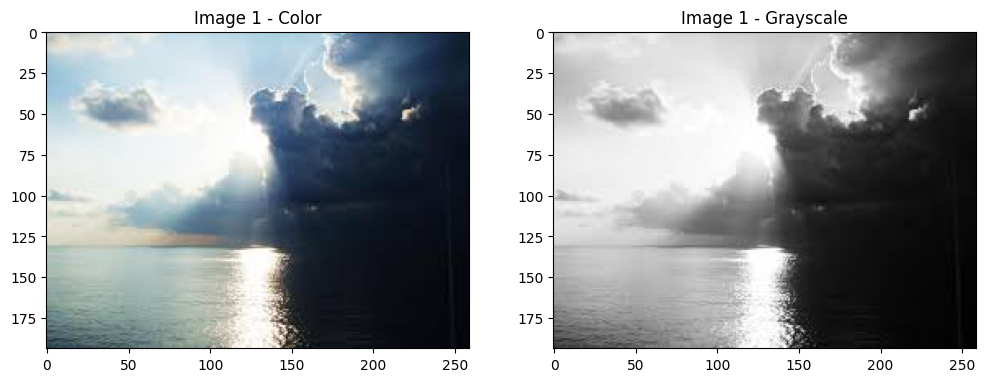

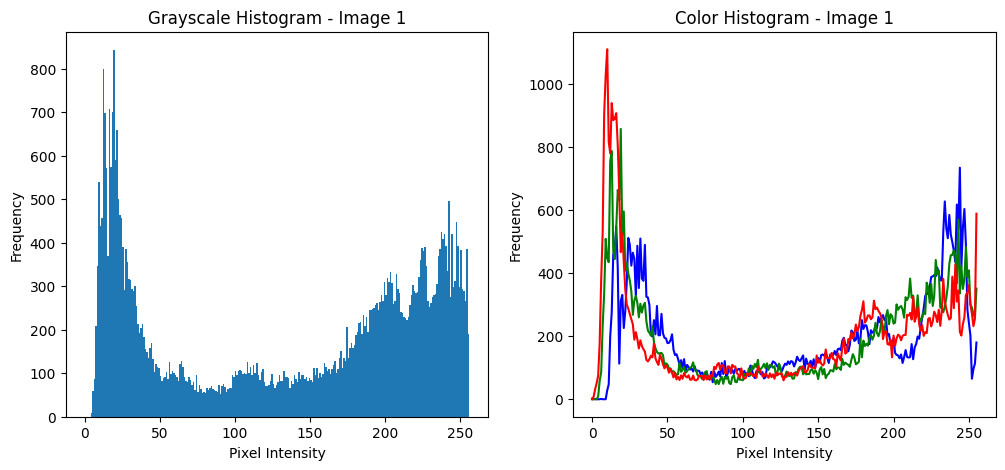

In [10]:
image1 = cv2.imread(image1_path)
if image1 is None:
    print(f"Error: Could not load Image 1 from {image1_path}")
else:
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) # Converting Image 1 to grayscale

    # Display Image 1 in both grayscale and color
    plt.figure(figsize=(12, 5))  
    plt.subplot(1, 2, 1)  # Color image
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for correct display
    plt.title("Image 1 - Color")
    
    plt.subplot(1, 2, 2) # Grayscale image
    plt.imshow(gray_image1, cmap='gray')
    plt.title("Image 1 - Grayscale") 
    plt.show()

    # Histograms for Image 1
    plt.figure(figsize=(12, 5))
   
    plt.subplot(1, 2, 1) # Grayscale histogram
    plt.hist(gray_image1.ravel(), 256, [0, 256])
    plt.title("Grayscale Histogram - Image 1")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2) # Color histogram
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        hist = cv2.calcHist([image1], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
    plt.title("Color Histogram - Image 1")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    plt.show()




## Image 2:

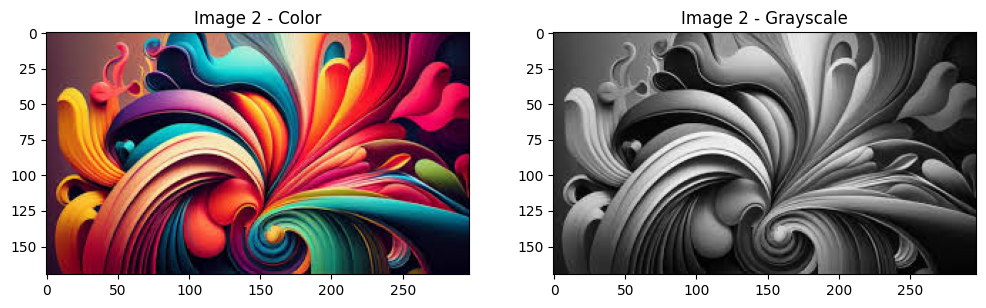

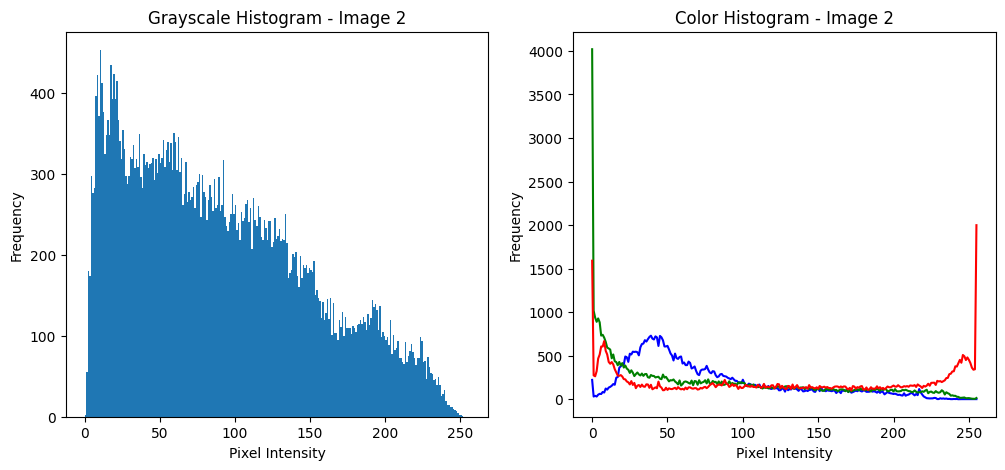

In [9]:
image2 = cv2.imread(image2_path)
if image2 is None:
    print(f"Error: Could not load Image 2 from {image2_path}")
else:
    # Convert Image 2 to grayscale
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Display Image 2 in both grayscale and color
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1) # Color image
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for correct display
    plt.title("Image 2 - Color")
    
    plt.subplot(1, 2, 2)  # Grayscale image
    plt.imshow(gray_image2, cmap='gray')
    plt.title("Image 2 - Grayscale")
    plt.show()

    # Display histograms for Image 2
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1) # Grayscale histogram
    plt.hist(gray_image2.ravel(), 256, [0, 256])
    plt.title("Grayscale Histogram - Image 2")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2) # Color histogram
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        hist = cv2.calcHist([image2], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
    plt.title("Color Histogram - Image 2")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    plt.show()

## 2. Change the Bin Size (3 Different Sizes) for Both Images and Observe the Changes

This section generates histograms for both images using three different bin sizes: 16, 32, and 64. By observing these histograms, we can analyze how the pixel intensity distribution changes with different levels of granularity in the data representation.

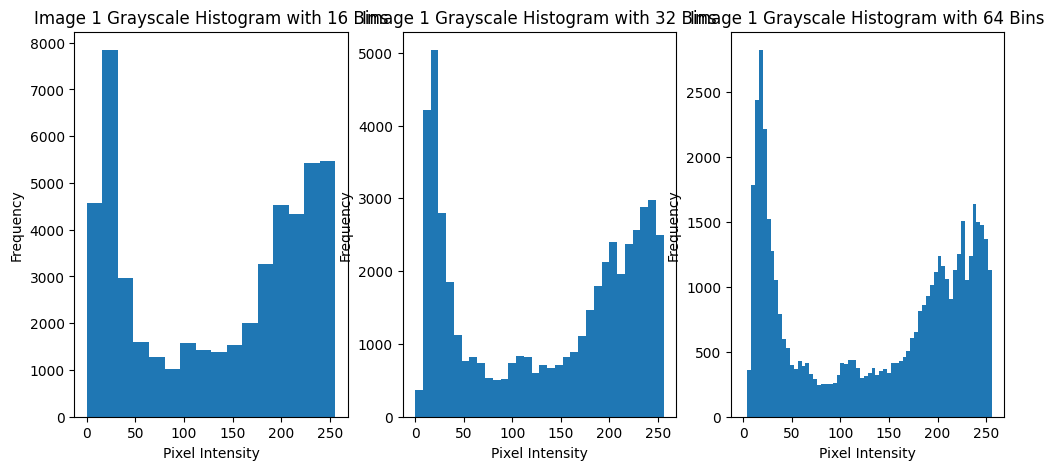

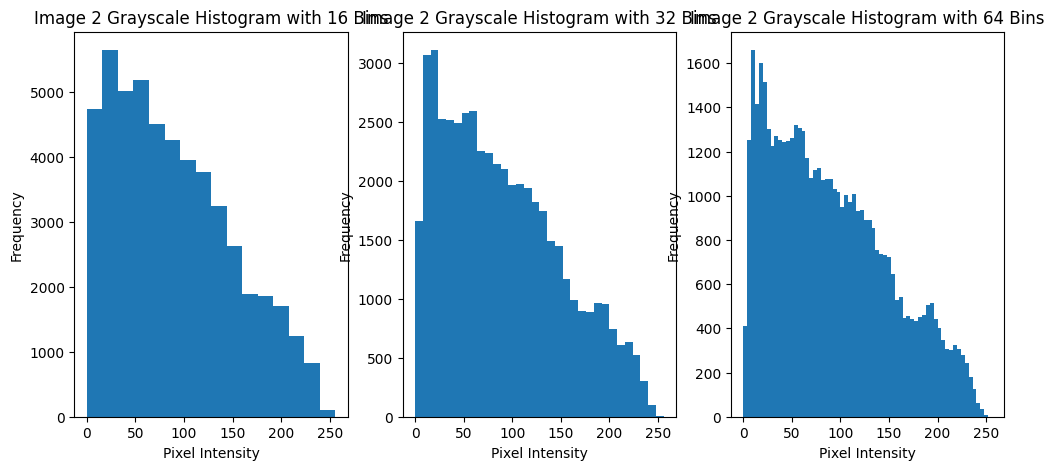

In [12]:
bins = [16, 32, 64]

def display_histograms_with_bins(image, gray_image, image_name):
    plt.figure(figsize=(12, 5))
    for i, bin_size in enumerate(bins):
        plt.subplot(1, 3, i + 1)
        plt.hist(gray_image.ravel(), bin_size, [0, 256])
        plt.title(f"{image_name} Grayscale Histogram with {bin_size} Bins")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
    plt.show()

# Convert images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Display histograms with different bin sizes for Image 1
display_histograms_with_bins(image1, gray_image1, "Image 1")

# Display histograms with different bin sizes for Image 2
display_histograms_with_bins(image2, gray_image2, "Image 2")


## 3. Mask the Center Region of Image 2 with Your Own Choice of Size


In this section, a mask is applied to the center region of Image 2, and the corresponding histogram is generated. This operation allows us to focus on specific areas of the image for further analysis.

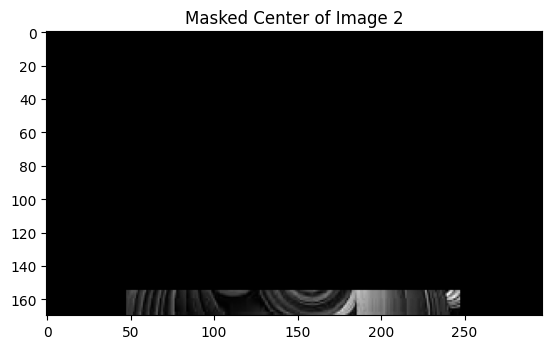

In [20]:
def mask_center_region(image, gray_image, image_name, mask_size=100):
    height, width = image.shape[:2]
    center_y, center_x = height // 2, width // 2

    mask = np.zeros((height, width), dtype=np.uint8)
    mask[center_y - mask_size:center_y + mask_size, center_x - mask_size:center_x + mask_size] = 255
    masked_image = cv2.bitwise_and(gray_image, gray_image, mask=mask)
    plt.imshow(masked_image, cmap='gray')
    plt.title(f"Masked Center of {image_name}")
    plt.show()

    return masked_image

masked_image2 = mask_center_region(image2, gray_image2, "Image 2") # Mask the center region of Image 2

## 4. Calculate and Display the Histogram of the Masked Image


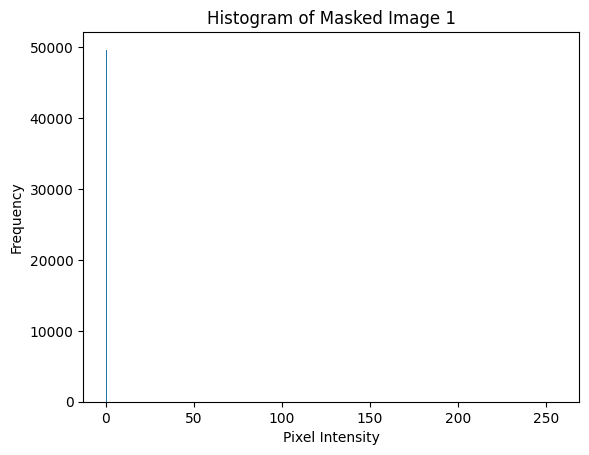

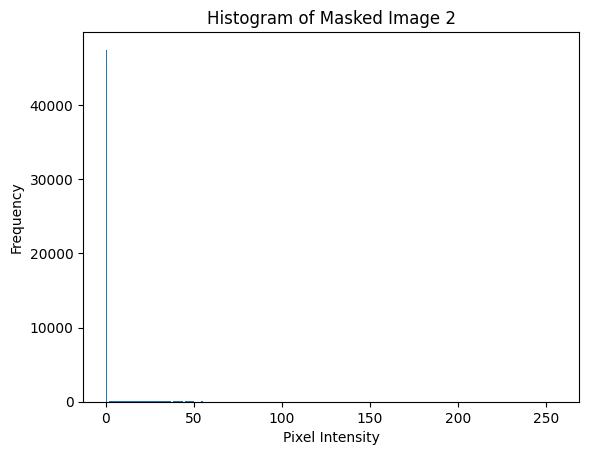

In [14]:
def display_masked_histogram(masked_image, image_name):
    plt.hist(masked_image.ravel(), 256, [0, 256])
    plt.title(f"Histogram of Masked {image_name}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Display histogram of masked Image 1
display_masked_histogram(masked_image1, "Image 1")

# Display histogram of masked Image 2
display_masked_histogram(masked_image2, "Image 2")


## 5. Scalar Multiplication with a Value Above 1 and Observe Changes

In this section, the brightness of both Image 1 and Image 2 is increased using scalar multiplication with a value of 1.5. The modified images and their corresponding histograms are displayed, allowing for analysis of how pixel intensities shift towards higher values.

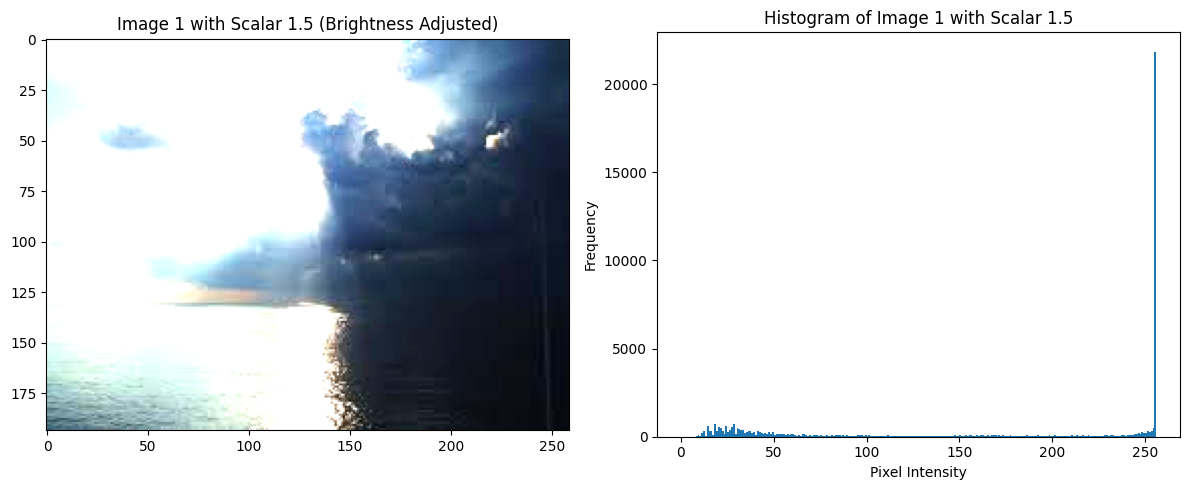

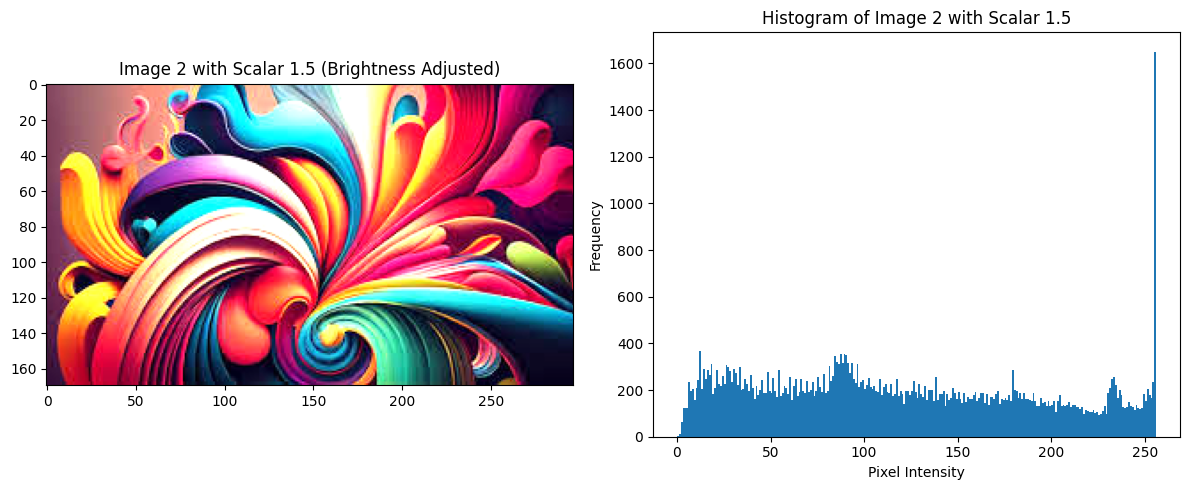

In [17]:
def scalar_multiplication(image, scalar_value, image_name):
    modified_image = cv2.convertScaleAbs(image, alpha=scalar_value)
    gray_modified_image = cv2.cvtColor(modified_image, cv2.COLOR_BGR2GRAY)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
    plt.title(f"{image_name} with Scalar {scalar_value} (Brightness Adjusted)")

    plt.subplot(1, 2, 2)
    plt.hist(gray_modified_image.ravel(), 256, [0, 256])
    plt.title(f"Histogram of {image_name} with Scalar {scalar_value}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

scalar_multiplication(image1, 1.5, "Image 1") # Scalar multiplication with value above 1 for Image 1
scalar_multiplication(image2, 1.5, "Image 2")# Scalar multiplication with value above 1 for Image 2

## 6. Scalar Multiplication with a Value Between 0 and 1 and Observe Changes

This section decreases the brightness of both images using scalar multiplication with a value of 0.5. The effects of this operation are displayed alongside the corresponding histograms, which show how pixel intensities move toward lower values.

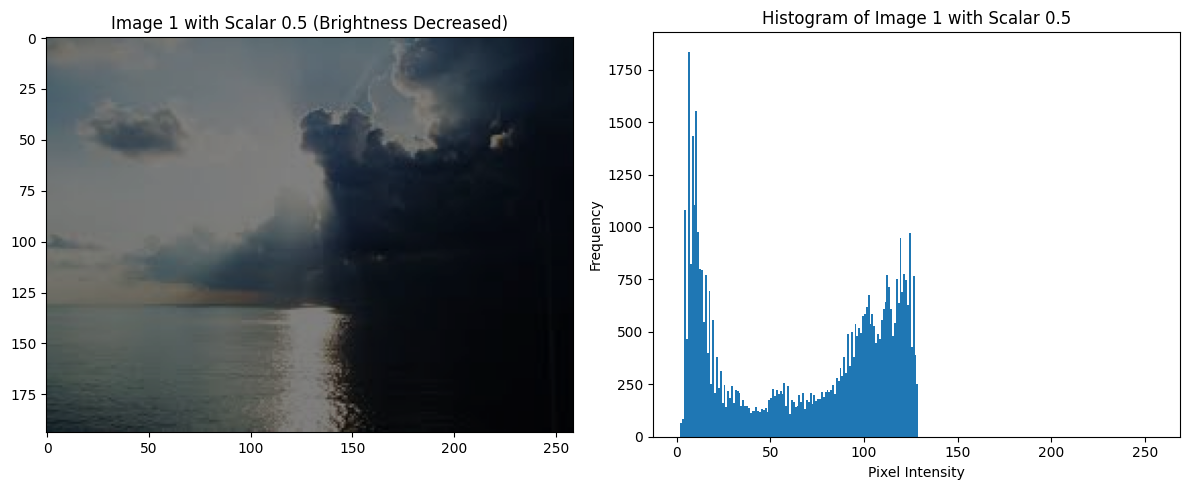

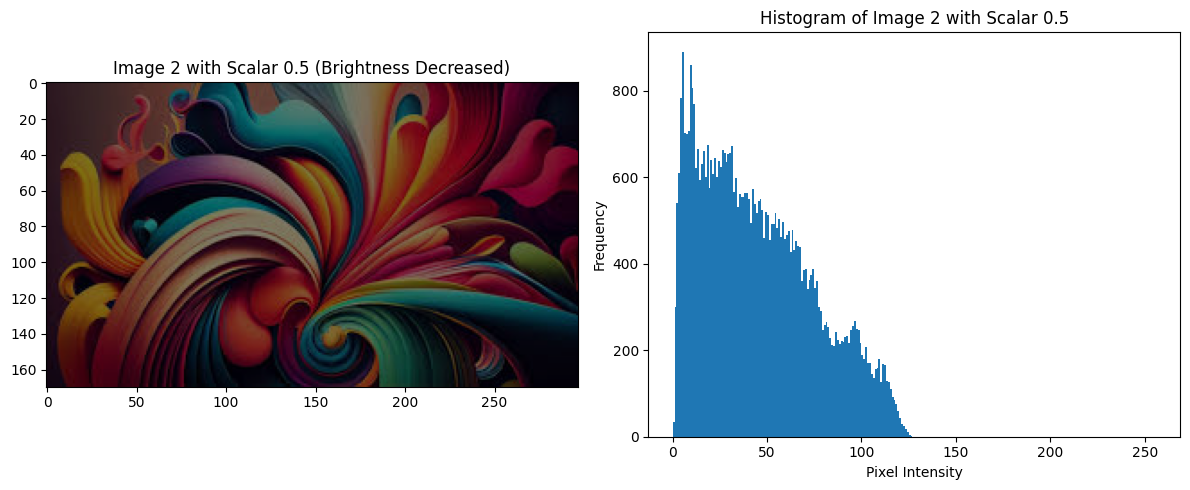

In [18]:
def scalar_multiplication_decrease(image, scalar_value, image_name):
    modified_image = cv2.convertScaleAbs(image, alpha=scalar_value)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
    plt.title(f"{image_name} with Scalar {scalar_value} (Brightness Decreased)")

    gray_modified_image = cv2.cvtColor(modified_image, cv2.COLOR_BGR2GRAY)
    plt.subplot(1, 2, 2)
    plt.hist(gray_modified_image.ravel(), 256, [0, 256])
    plt.title(f"Histogram of {image_name} with Scalar {scalar_value}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

scalar_multiplication_decrease(image1, 0.5, "Image 1") # Scalar multiplication with value between 0 and 1 for Image 1
scalar_multiplication_decrease(image2, 0.5, "Image 2") # Scalar multiplication with value between 0 and 1 for Image 2

## Conclusion:

The report demonstrated various image processing techniques using **OpenCV** and **Matplotlib** in Python. The analysis included displaying images in different formats, changing bin sizes for histogram representation, adjusting brightness through scalar multiplication, and applying a mask to isolate specific image areas. Each technique provides unique insights into image characteristics and pixel intensity distributions. The findings highlight how different operations affect pixel values and overall image quality, which is crucial in fields such as computer vision, medical imaging, and photography. Understanding these processes equips practitioners with the knowledge to manipulate images effectively for desired outcomes. This comprehensive approach to image processing emphasizes the importance of visualization and analysis in enhancing image quality and achieving specific goals in various applications.

